In [1]:
library(DDoutlier)

In [2]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [3]:
library(ggbiplot)

Loading required package: plyr

Loading required package: scales

Loading required package: grid



# Load data

In [5]:
data.dir <- paste(getwd(), "..", "..", "data", sep="/")
labs <- paste(data.dir, "mimic_top_labs.csv", sep="/")

In [6]:
data <- read.csv(labs)
rownames(data) <- data$stay_id
data <- subset(data, select = -c(X, hadm_id))
data[is.na(data)] <- 0
head(data)

,glucose,hemoglobin,anion_gap,bicarbonate,calcium_total,chloride,creatinine,magnesium,phosphate,potassium,sodium,urea_nitrogen,hematocrit,mch,mchc,mcv,platelet_count,rdw,red_blood_cells,white_blood_cells
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,286.5,13.05,27.0,23.50000,8.55,84.0000,3.85,2.1,6.65,4.45,130.0,99.00,41.10000,27.75,31.75,87.50000,104.5000,20.45,4.705000,12.40000
2,180.6,11.24,16.0,22.33333,0.00,100.3333,0.70,2.3,3.50,4.30,132.5,14.25,32.56667,30.94,33.94,91.40000,244.0000,12.38,3.660000,9.08000
3,1000.0,0.00,0.0,0.00000,0.00,0.0000,0.00,0.0,0.00,0.00,0.0,0.00,0.00000,0.00,0.00,0.00000,0.0000,0.00,0.000000,0.00000
4,0.0,0.00,0.0,0.00000,0.00,0.0000,0.95,2.1,0.00,4.45,138.5,16.00,48.10000,0.00,0.00,0.00000,185.0000,0.00,0.000000,5.20000
5,138.5,12.70,14.5,23.00000,9.50,104.5000,0.70,1.9,3.70,4.55,137.5,14.00,36.80000,30.30,34.60,87.50000,321.0000,13.20,4.200000,9.90000
6,125.8,9.70,14.2,22.80000,10.92,108.2000,0.94,2.2,4.28,4.34,141.0,51.40,33.10000,24.40,29.30,83.33333,150.3333,18.40,3.973333,15.23333


# Univariate outlier detection

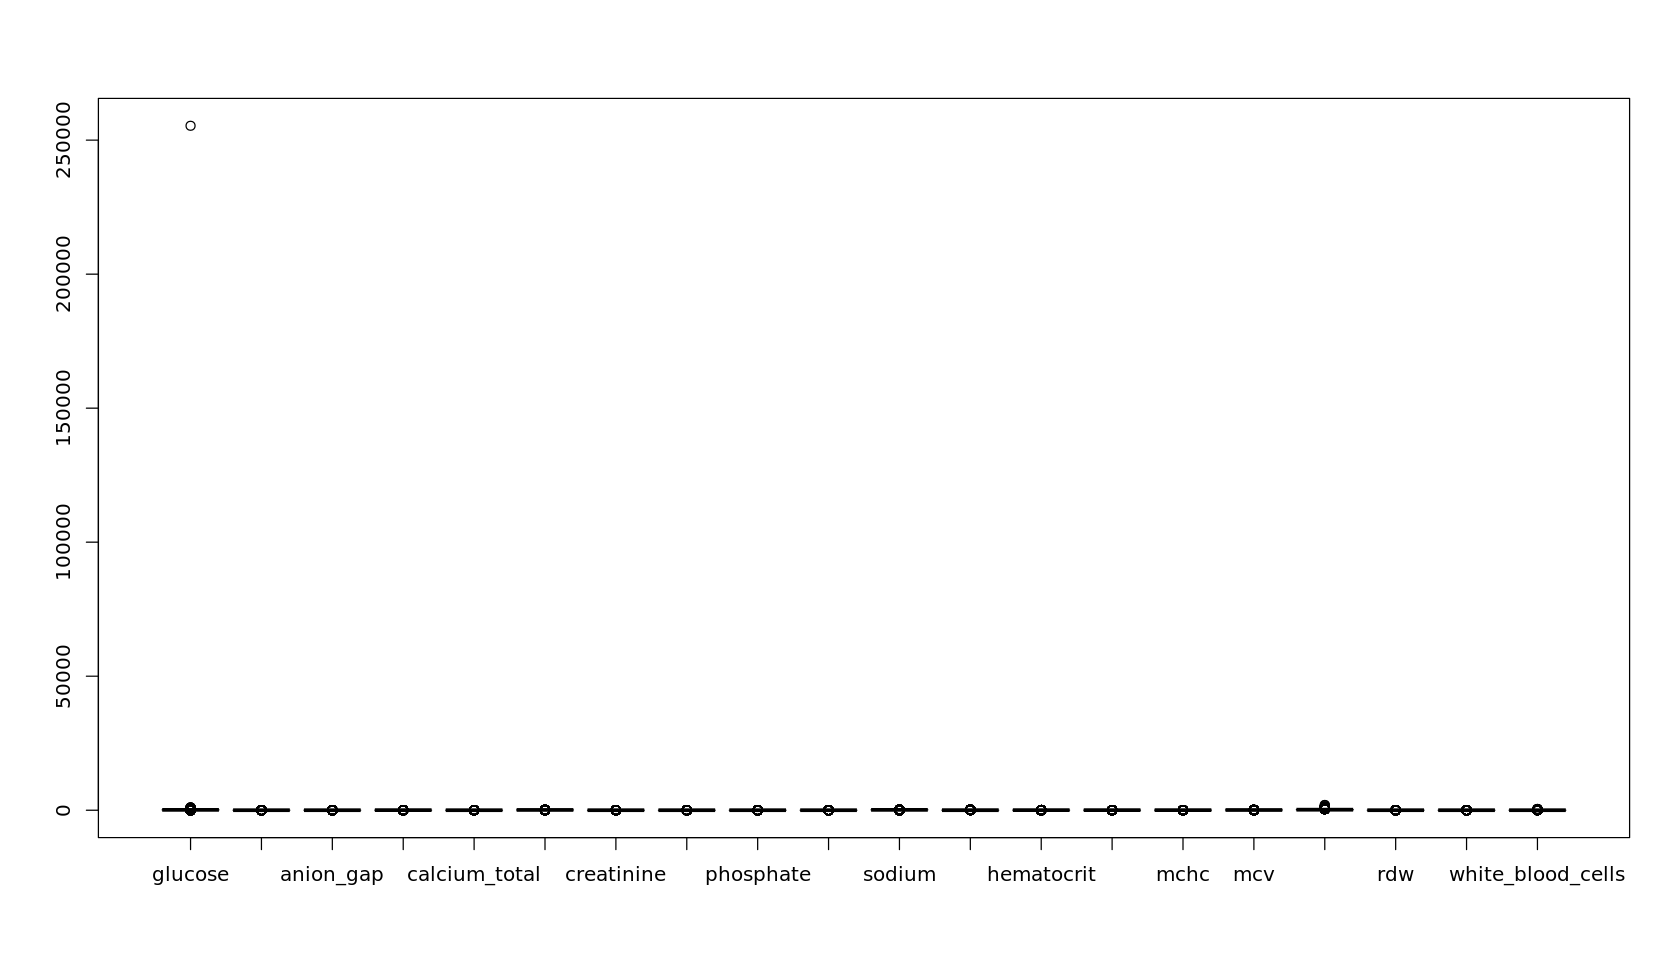

In [7]:
options(repr.plot.width = 14, repr.plot.height = 8)
boxplot(data)

# Unsupervized outlier detection algorithms

In [8]:
y1 <- DDoutlier::KNN_AGG(data,  k_min=10, k_max=20)

In [9]:
y2 <- DDoutlier::LOF(data, k=10)

In [10]:
# y3 <- DDoutlier::COF(data, k=10)

In [11]:
y4 <- DDoutlier::INFLO(data, k=10)

In [12]:
y5 <- DDoutlier::KDEOS(data, k_min=10, k_max=20)

In [13]:
y6 <- DDoutlier::LDF(data, k=10)

In [14]:
# y7 <- DDoutlier::LDOF(data, k=10)

In [15]:
# Y <- cbind.data.frame(y1, y2, y3, y4, y5, y6$LDF, y7)
Y <- cbind.data.frame(y1, y2, y4, y5, y6$LDF)

# Item Response Theory (IRT) emsemble

In [16]:
ens1 <- outlierensembles::irt_ensemble(Y)

Warning message in sqrt(diag(solve(Hess))):
“NaNs produced”


# IRT ensemble scores

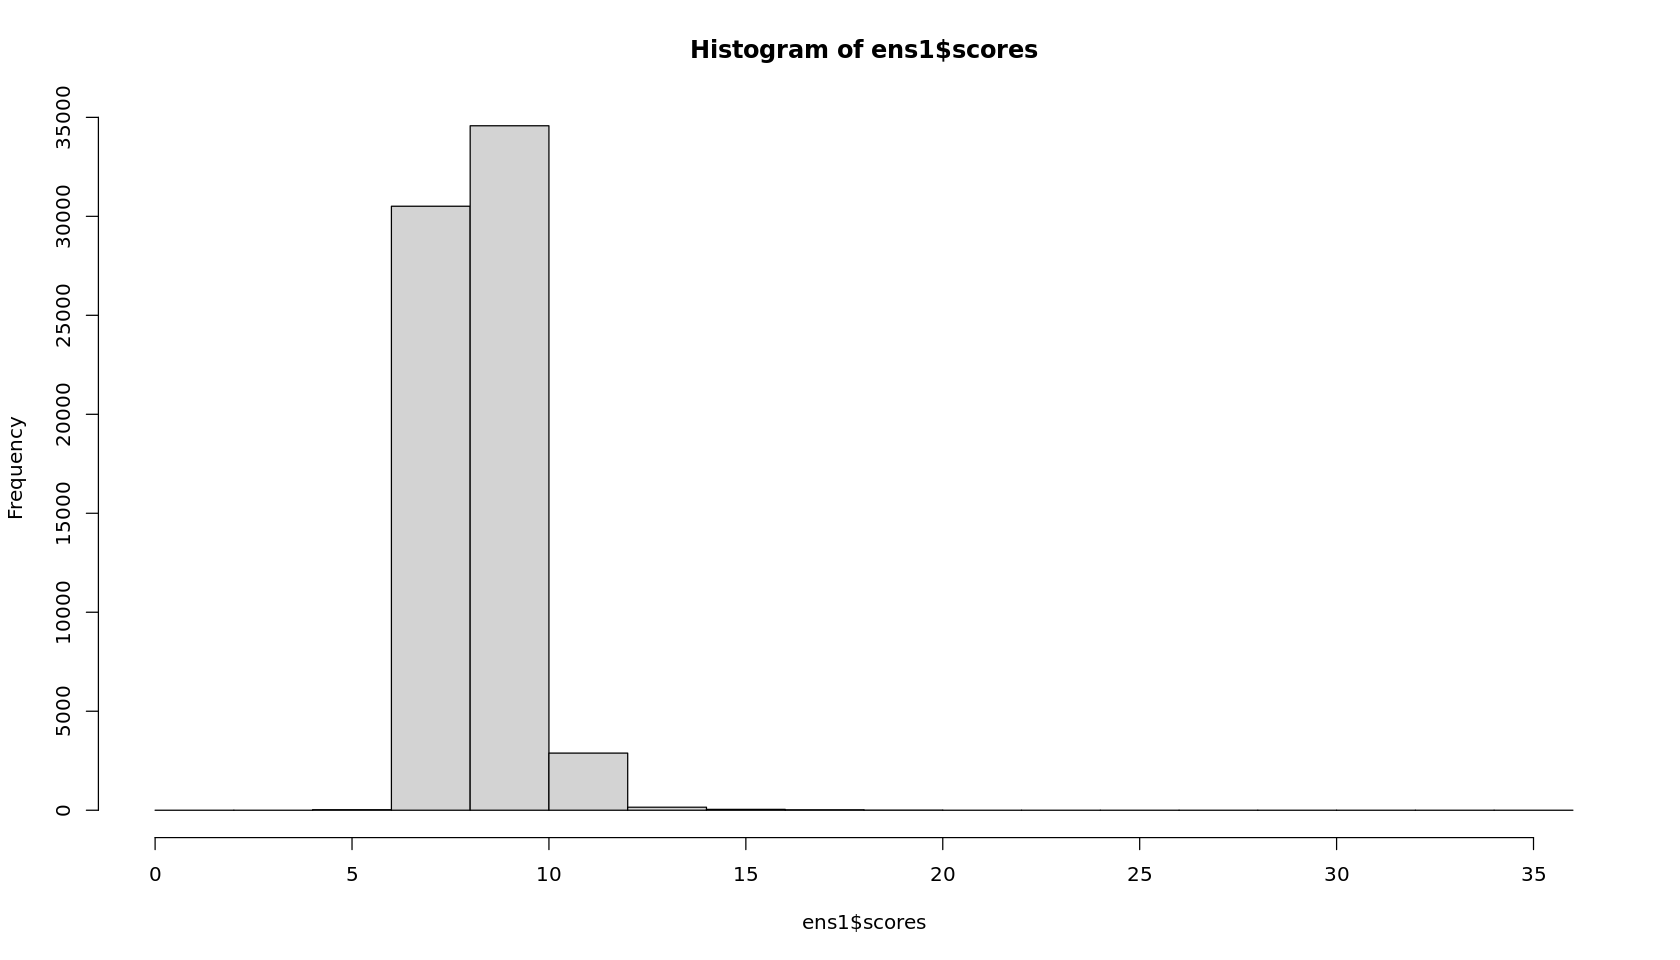

In [17]:
hist(ens1$scores)

In [18]:
summary(ens1$scores)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   7.528   8.119   8.230   8.801  34.759 

In [19]:
df <- cbind.data.frame(data, y1, y2, y4, y5, y6$LDF, ens1$scores)

In [22]:
colnames(df) <- list('glucose', 'hemoglobin', 'anion_gap', 'bicarbonate', 'calcium_total', 'chloride', 'creatinine', 'magnesium', 'phosphate', 'potassium', 'sodium', 'urea_nitrogen', 'hematocrit', 'mch', 'mchc', 'mcv', 'platelet_count', 'rdw', 'red_blood_cells', 'white_blood_cells', 'y_knn_agg', 'y_lof', 'y_inflo', 'y_kdeos', 'y_ldf', 'ensemble_scores')

In [23]:
head(df)

,glucose,hemoglobin,anion_gap,bicarbonate,calcium_total,chloride,creatinine,magnesium,phosphate,potassium,⋯,platelet_count,rdw,red_blood_cells,white_blood_cells,y_knn_agg,y_lof,y_inflo,y_kdeos,y_ldf,ensemble_scores
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,286.5,13.05,27.0,23.50000,8.55,84.0000,3.85,2.1,6.65,4.45,⋯,104.5000,20.45,4.705000,12.40000,6095.649,1.0682865,0.9608475,0.22948057,0.9760647,9.314799
2,180.6,11.24,16.0,22.33333,0.00,100.3333,0.70,2.3,3.50,4.30,⋯,244.0000,12.38,3.660000,9.08000,2371.490,1.1419119,0.7944264,0.94478806,0.6537241,8.445129
3,1000.0,0.00,0.0,0.00000,0.00,0.0000,0.00,0.0,0.00,0.00,⋯,0.0000,0.00,0.000000,0.00000,52103.960,2.5020854,0.7882700,0.18886674,1.0000000,16.671456
4,0.0,0.00,0.0,0.00000,0.00,0.0000,0.95,2.1,0.00,4.45,⋯,185.0000,0.00,0.000000,5.20000,19248.887,1.3041505,1.2220766,0.12553497,0.9999885,12.659565
5,138.5,12.70,14.5,23.00000,9.50,104.5000,0.70,1.9,3.70,4.55,⋯,321.0000,13.20,4.200000,9.90000,1646.888,0.9714934,0.8854066,0.02787712,0.4496357,6.605067
6,125.8,9.70,14.2,22.80000,10.92,108.2000,0.94,2.2,4.28,4.34,⋯,150.3333,18.40,3.973333,15.23333,2562.537,1.1173364,0.8825462,0.91484435,0.8462421,8.704559


In [25]:
data.dir <- paste(getwd(), "..", "..", "data", sep="/")
mimic.selected.vitals.anomalies <- paste(data.dir, "mimic_top_labs_anomalies.csv", sep="/")
write.csv(data.frame("hadm_id"=rownames(df), df), mimic.selected.vitals.anomalies, row.names = FALSE)